In [1]:
# Imports and initial exploration of the dataset. 

import pandas as pd
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt # for plotting
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = pd.read_csv('/Users/Michele/Documents/GitHub/wine_price_predictions/winwinewine/winemag-data-130k-v2.csv')

labels = list(df.columns.values)
print(labels)

print(df.describe())
print(df.info())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Unnamed: 0', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']
          Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price       

In [108]:
# Cleaning the data checklist:

#1: Get rid of missing values or replace with dataset average. 

df.dropna(inplace=True)
df_wout_str_features=df.drop(['Unnamed: 0','description','taster_twitter_handle','title','country','designation','province','region_1','region_2','taster_name','variety','winery'],axis=1)


#2: Get rid of extreme outliers since it will worsen the predictions.

#3: Make non-continuous attributes categorical. 


print(df_wout_str_features.columns)
print('original df shape: ',df.shape)
print('df_without_str_features shape: ',df_wout_str_features.shape)

Index(['points', 'price'], dtype='object')
original df shape:  (22387, 14)
df_without_str_features shape:  (22387, 2)


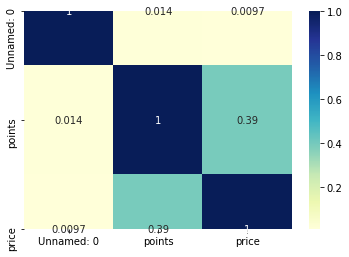

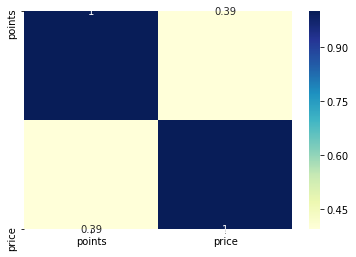

In [80]:
correlation = df.corr()
sns.heatmap(correlation,cmap="YlGnBu",annot=True)
plt.show()

correlation_wout_str_features = df_wout_str_features.corr()
sns.heatmap(correlation_wout_str_features,cmap="YlGnBu",annot=True)
plt.show()

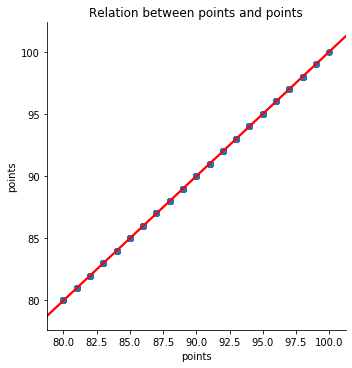

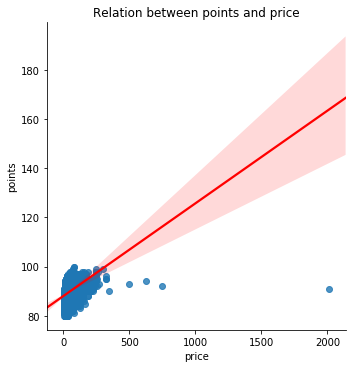

In [81]:
features = df_wout_str_features.columns
for i in features:
    sns.lmplot(x=i, y="points", data=df_wout_str_features,line_kws={'color': 'red'})
    text="Relation between points and " + i  
    plt.title(text)
    plt.show()

In [82]:
print(df_wout_str_features['price'].value_counts())
print(df_wout_str_features['points'].value_counts())

30.0      1066
50.0      1062
25.0      1027
35.0      1009
45.0      1003
          ... 
73.0         1
275.0        1
2013.0       1
111.0        1
112.0        1
Name: price, Length: 146, dtype: int64
90     3280
91     3027
88     2988
92     2461
87     2123
89     2030
93     1773
86     1390
94     1027
85      873
84      440
95      343
83      268
82      137
96      111
81       35
97       29
80       28
98       18
99        4
100       2
Name: points, dtype: int64


Text(0, 0.5, 'Frequency')

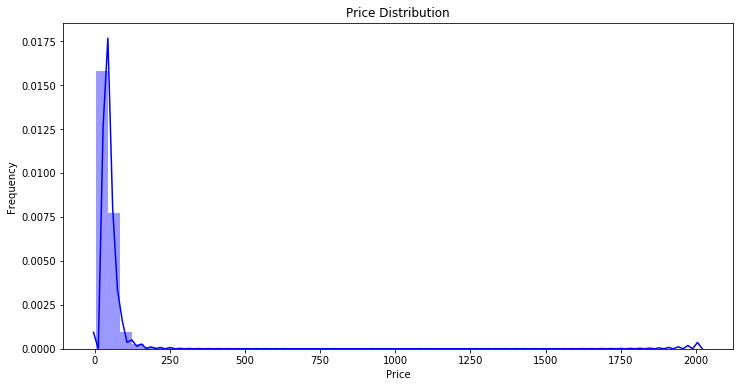

In [83]:
fig = plt.figure(figsize=(12,6))
plt.subplot(111)
sns.distplot(df_wout_str_features.price, hist=True, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

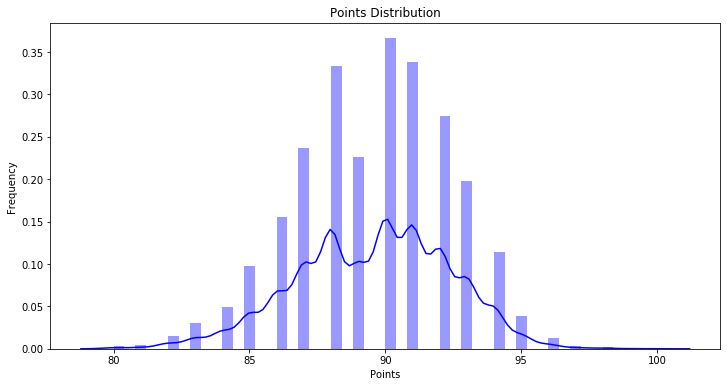

In [84]:
fig = plt.figure(figsize=(12,6))
plt.subplot(111)
sns.distplot(df_wout_str_features.points, hist=True, kde=True, color='blue')
plt.title('Points Distribution')
plt.xlabel('Points')
plt.ylabel('Frequency')

In [90]:
# We need to normalize our continous features. - and for price also still kick out outliers.
# Before I do that i will add some more computational features.



# this fucked up the price column somehow. I am not sure why. I am not overriding the price column itself.

#df_wout_str_features['price_per_points'] = df_wout_str_features['price']/df_wout_str_features['points']

#df_wout_str_features['points_per_price'] = df_wout_str_features['points']/df_wout_str_features['price']

#df_wout_str_features['frequency_prices_points'] = df_wout_str_features.groupby('price').count()['points']

#df_wout_str_features['frequency_points_prices'] = df_wout_str_features.groupby('points').count()['price']

#df_wout_str_features['mean_price_per_points'] = df_wout_str_features['price_per_points'].mean()

#df_wout_str_features['mean_points_per_price'] = df_wout_str_features['points_per_price'].mean()

print(df_wout_str_features.columns)

Index(['points', 'price'], dtype='object')


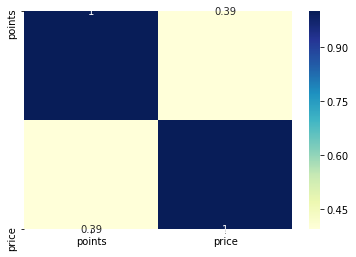

In [91]:
correlation_new = df_wout_str_features.corr()
sns.heatmap(correlation_new,cmap="YlGnBu",annot=True)
plt.show()

In [68]:
# My inspration for this came from here: https://medium.com/@whitcrrd/linear-regression-part-ii-eda-feature-engineering-e66ea8763538


30.0      1066
50.0      1062
25.0      1027
35.0      1009
45.0      1003
          ... 
73.0         1
275.0        1
2013.0       1
111.0        1
112.0        1
Name: price, Length: 146, dtype: int64
float64


Text(0, 0.5, 'Frequency')

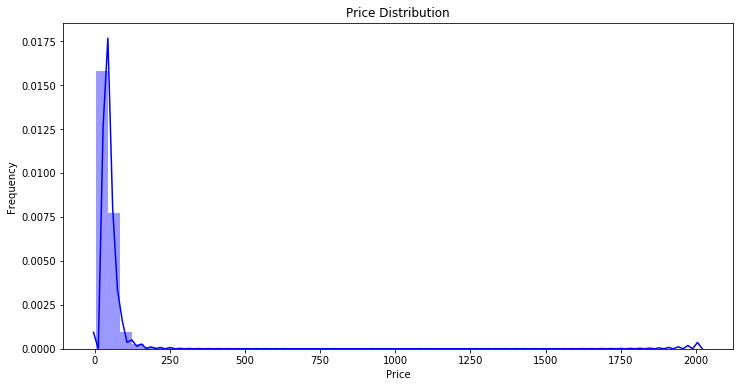

In [113]:
# OK I AM STUCK! Why is my price column the values from points? Wtf? 
#print(df_wout_str_features[df_wout_str_features['price'].isnull()])
df_wout_str_features['price'].astype(int) # <--- this doesn't work apparently. 
#df_wout_str_features['price'] = df_wout_str_features[df_wout_str_features.price < 250] #<--- this breaks the price column
print(df_wout_str_features['price'].value_counts())
print(df_wout_str_features['price'].dtype)


fig = plt.figure(figsize=(12,6))
plt.subplot(111)
sns.distplot(df_wout_str_features.price, hist=True, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')